In [40]:
library(tidyverse)
library(broom)

In [41]:
data <- read_csv('/home/andrea/DSSC/sml/stats.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  id = col_character()
)
See spec(...) for full column specifications.


In [42]:
data %>%
    drop_na() %>%
    #transmute (label = factor(label)) %>%
    select(c(id, label, ecc_mean, area_mean, solidity_mean)) %>%
    group_by(label) %>%
    summarise( 
        EccMean    = mean(ecc_mean),
        EccSd      = sd (ecc_mean),
        AreaMean   = mean(area_mean),
        AreaSd     = sd (area_mean),
        SolidMean  = mean (solidity_mean),
        SolidSd    = sd (solidity_mean)
    )

label,EccMean,EccSd,AreaMean,AreaSd,SolidMean,SolidSd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.7725312,0.05831977,941.9886,466.0100,0.8096812,0.05856819
1,0.7855911,0.04635417,959.6343,350.5769,0.7826954,0.05546366


In [43]:
data %>%
    drop_na() %>%
    select(c(id, label, ecc_mean, area_mean, solidity_mean)) %>%
    do(tidy(t.test(ecc_mean ~ label, data = .)))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.01305991,0.7725312,0.7855911,-58.3477,0,214817,-0.01349861,-0.01262121,Welch Two Sample t-test,two.sided


In [44]:
data %>%
    drop_na() %>%
    select(c(id, label, ecc_mean, area_mean, solidity_mean)) %>%
    do(tidy(t.test(solidity_mean ~ label, data = .)))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0269858,0.8096812,0.7826954,109.5058,0,198067.9,0.0265028,0.0274688,Welch Two Sample t-test,two.sided


In [45]:
data %>%
    drop_na() %>%
    select(c(id, label, ecc_mean, area_mean, solidity_mean)) %>%
    do(tidy(t.test(area_mean ~ label, data = .)))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-17.64572,941.9886,959.6343,-10.12305,4.419981e-24,217836.7,-21.0622,-14.22924,Welch Two Sample t-test,two.sided


 # Normality check


	Jarque Bera Test

data:  s
X-squared = 2603.6, df = 2, p-value < 2.2e-16



	Jarque Bera Test

data:  e
X-squared = 1586.6, df = 2, p-value < 2.2e-16



	Jarque Bera Test

data:  a
X-squared = 548640000, df = 2, p-value < 2.2e-16


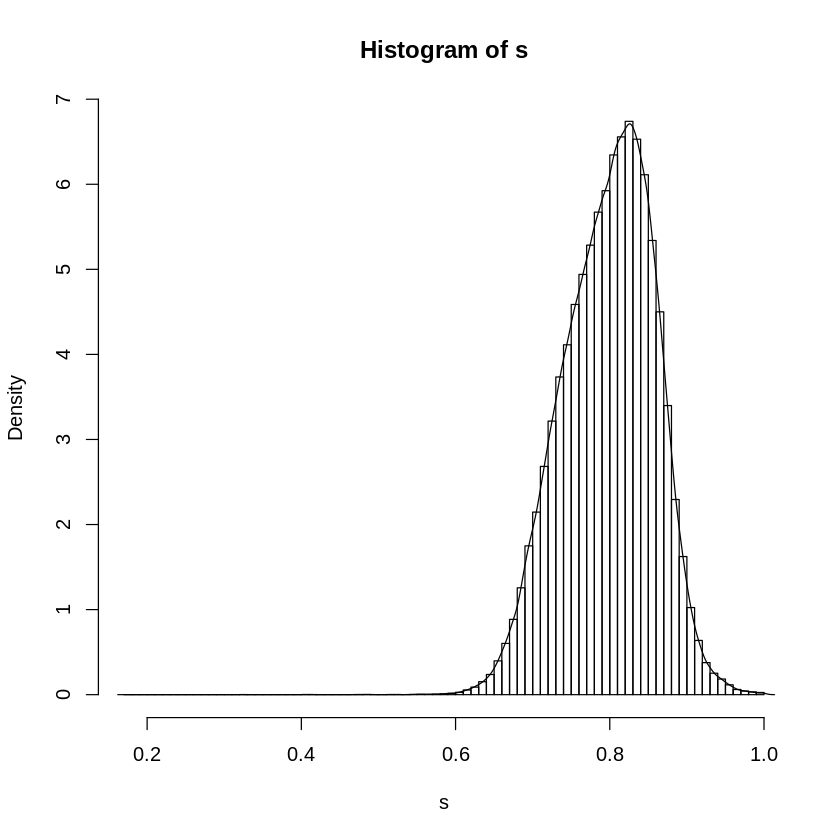

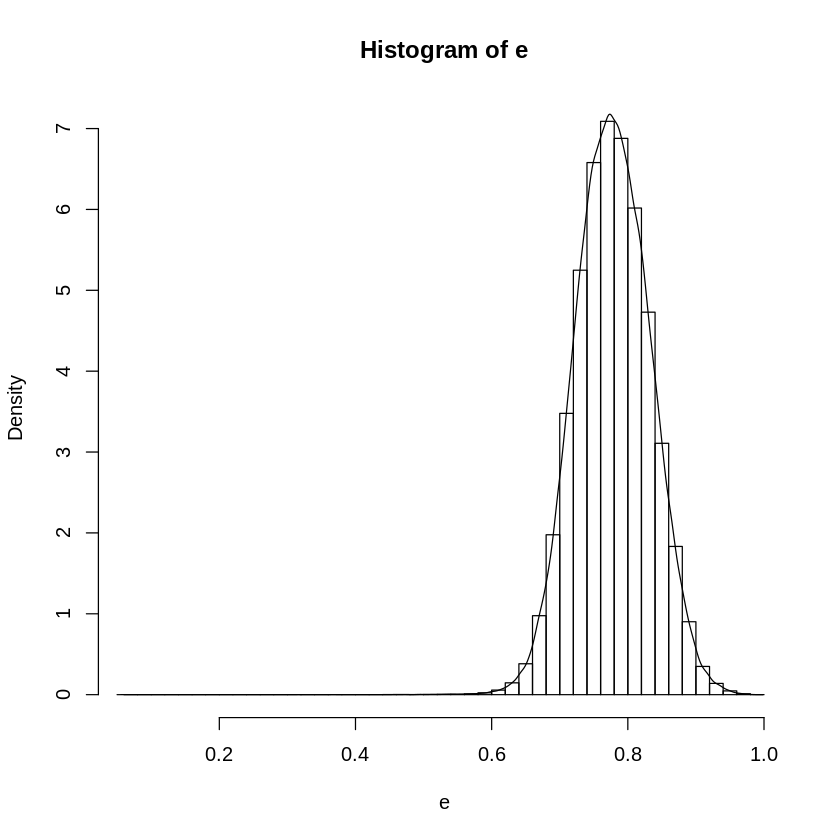

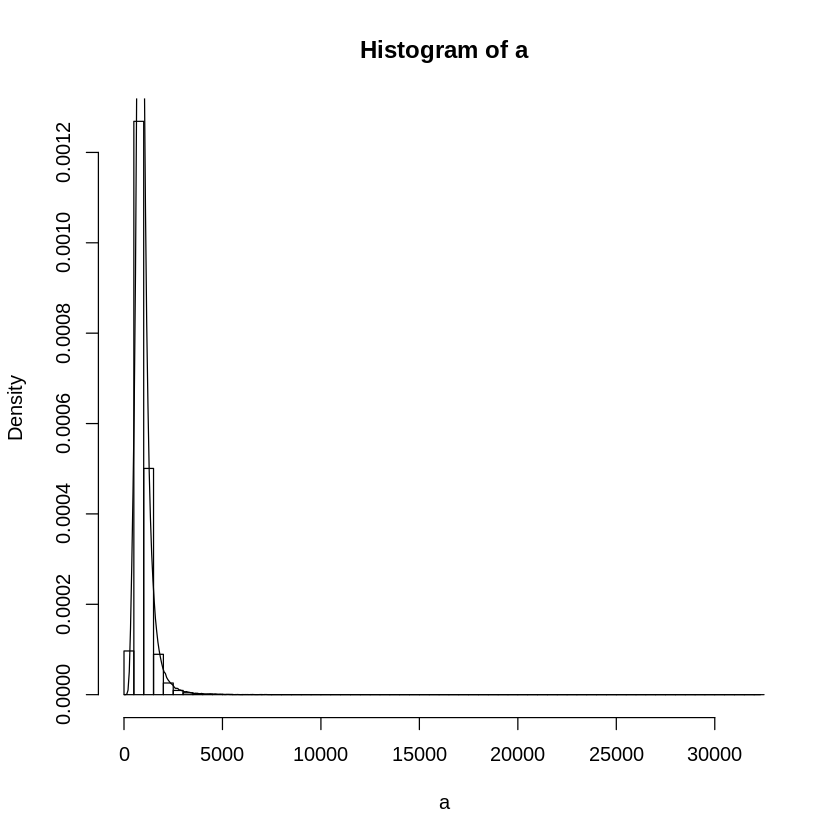

In [72]:
s <- data %>%
    drop_na() %>%
    pull (solidity_mean)

e <- data %>%
    drop_na() %>%
    pull (ecc_mean)

a <- data %>%
    drop_na() %>%
    pull (area_mean)


#normality test: not passed.

jarque.bera.test(s)
jarque.bera.test(e)
jarque.bera.test(a)


hist(s, breaks = 60, freq=FALSE)
lines(density(s))

hist(e, breaks = 60, freq=FALSE)
lines(density(e))

hist(a, breaks = 60, freq=FALSE)
lines(density(a))

# Assuming normality anyway...

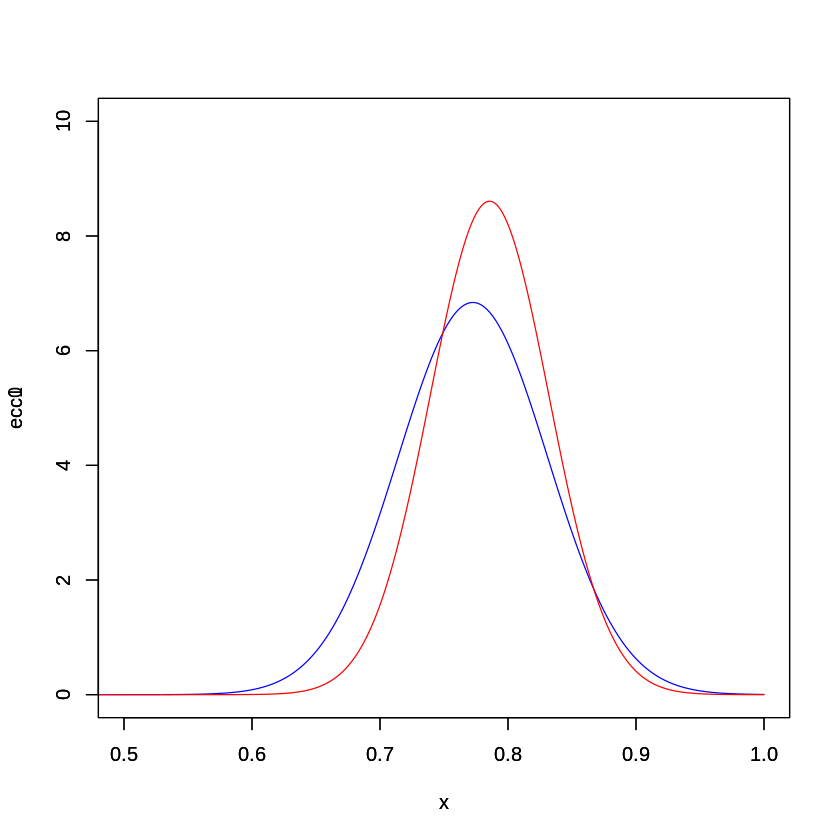

In [7]:
#plot di eccentricità

x <- seq(0, 1, length=1000)
ecc0 <- dnorm(x, mean=0.7725312, sd=0.05831977)
ecc1 <- dnorm(x, mean=0.7855911, sd= 0.04635417)
plot(x, ecc0, type="l", lwd=1, col = "blue", xlim=c(0.5,1), ylim=c(0,10))
par(new=TRUE)
plot(x, ecc1, type="l", lwd=1, col="red", xlim=c(0.5,1), ylim=c(0,10))

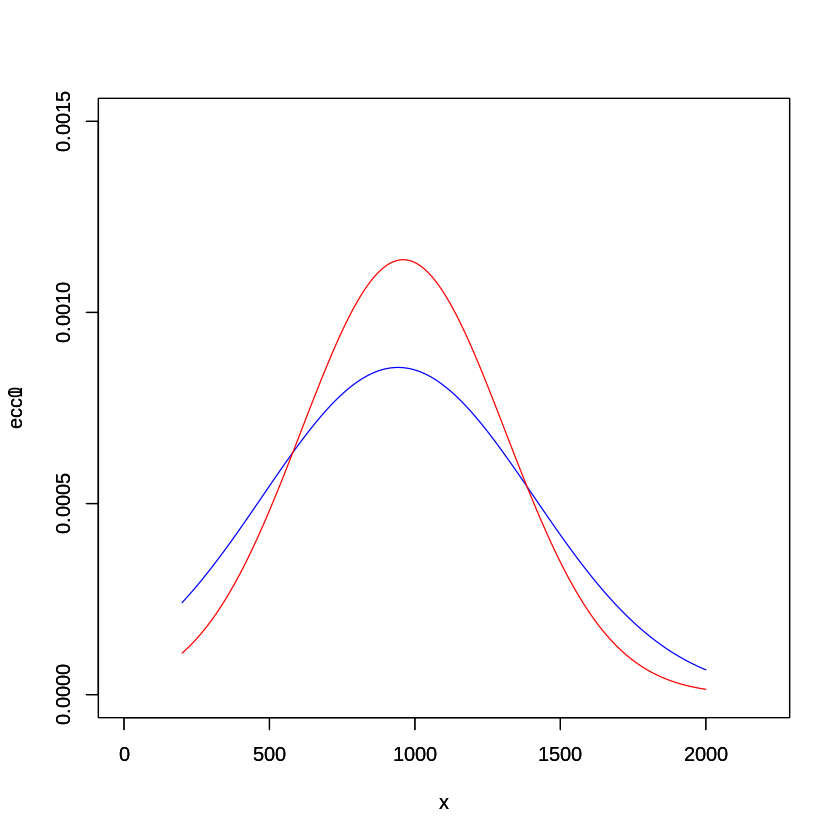

In [8]:
#plot di area

x <- seq(200, 2000, length=1000)
ecc0 <- dnorm(x, mean=941.9882, sd=466.0100)
ecc1 <- dnorm(x, mean=959.6343, sd=350.5769)
plot(x, ecc0, type="l", lwd=1, col = "blue", xlim=c(000,2200), ylim=c(0,0.0015))
par(new=TRUE)
plot(x, ecc1, type="l", lwd=1, col="red", xlim=c(00,2200), ylim=c(0,0.0015))

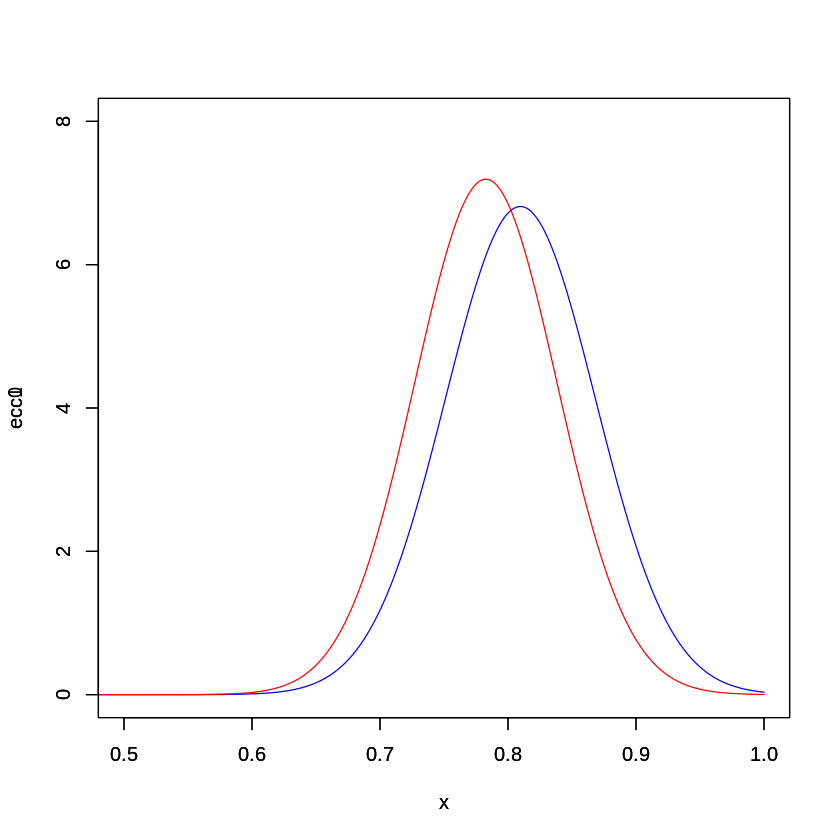

In [9]:
#plot di solidity

x <- seq(0, 1, length=1000)
ecc0 <- dnorm(x, mean=0.8096812, sd=0.05856819)
ecc1 <- dnorm(x, mean=0.7826954, sd=0.05546366)
plot(x, ecc0, type="l", lwd=1, col = "blue", xlim=c(000.5,1), ylim=c(0,8))
par(new=TRUE)
plot(x, ecc1, type="l", lwd=1, col="red", xlim=c(00.5,1), ylim=c(0,8))


# Correlation plot


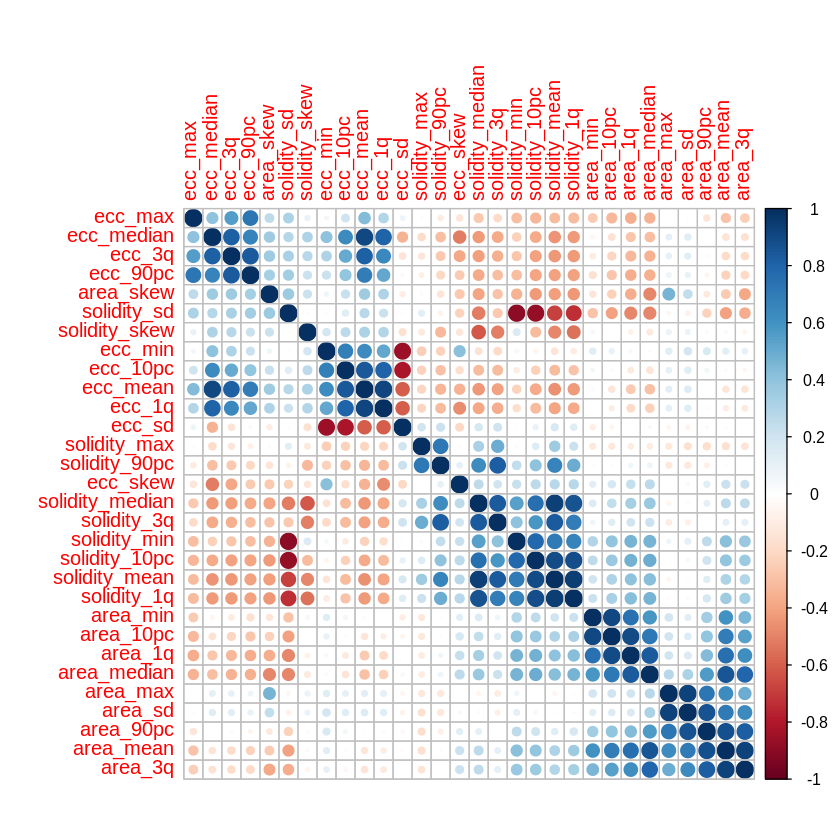

In [163]:
library(Hmisc)   # corrplot

ds_cor <- data %>%
  na.omit() %>%    # drop na
  select(-id, -label) %>%   #remove id and label
  as.matrix() %>%  # convert to matrix
  cor()  # correlation matrix

library(corrplot)
corrplot(ds_cor, method="circle", order = "hclust")  # hierarchical clustering included